## STEP-BY-STEP ANALYSIS INSTRUCTIONS

### PHASE 1: SETUP & DATA LOADING


**Step 1.1: Import Essential Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# For statistical analysis
from scipy import stats
from scipy.stats import ttest_ind, mannwhitneyu

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

**Step 1.2: Mount Google Drive & Load Datasets**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Load datasets
# Note: Paths updated for local environment or as per instruction.
# In the assignment context, we assume the files are available.
trader_data = pd.read_csv(r'/content/historical_data.csv')
sentiment_data = pd.read_csv(r'/content/fear_greed_index.csv')
sentiment_data.rename(columns={'date': 'Date', 'classification': 'Classification'}, inplace=True)

# Pre-processing to match prompt schema if using different dataset version
rename_map = {
    'Account': 'account',
    'Coin': 'symbol',
    'Execution Price': 'execution price',
    'Size USD': 'size',
    'Side': 'side',
    'Timestamp': 'time',
    'Closed PnL': 'closedPnL',
    'Direction': 'event'
}
trader_data.rename(columns=rename_map, inplace=True)
if 'leverage' not in trader_data.columns:
    trader_data['leverage'] = 1.0
if pd.api.types.is_numeric_dtype(trader_data['time']):
    trader_data['time'] = pd.to_datetime(trader_data['time'], unit='ms')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Step 1.3: Initial Data Exploration**
- Display first/last 10 rows of each dataset
- Show dataset shapes, info, and column types
- Check for missing values: `df.isNone().sum()`
- Display basic statistics: `df.describe()`
- Check unique values in categorical columns

In [ ]:
# Display first/last 10 rows
display(trader_data.head(10))
display(trader_data.tail(10))
display(sentiment_data.head(10))
display(sentiment_data.tail(10))

# Dataset info
print(trader_data.info())
print(sentiment_data.info())

# Missing values
print(trader_data.isna().sum())
print(sentiment_data.isna().sum())

# Basic stats
print(trader_data.describe())

# Unique values
print(trader_data['side'].unique())
print(trader_data['event'].unique())
print(sentiment_data['Classification'].unique())

,account,symbol,execution price,Size Tokens,size,side,Timestamp IST,Start Position,event,closedPnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,time,leverage
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,2024-10-27 03:33:20,1.0
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,2024-10-27 03:33:20,1.0
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,2024-10-27 03:33:20,1.0
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,2024-10-27 03:33:20,1.0
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,2024-10-27 03:33:20,1.0
5,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9900,1.41,11.27,BUY,02-12-2024 22:50,1298.215466,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.000493,7.330000e+14,2024-10-27 03:33:20,1.0
6,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9934,144.09,1151.77,BUY,02-12-2024 22:50,1299.624972,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,9.060000e+14,2024-10-27 03:33:20,1.0
7,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,8.0000,34.00,272.00,BUY,02-12-2024 22:50,1443.664541,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.011900,3.960000e+14,2024-10-27 03:33:20,1.0
8,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,8.0000,46.00,368.00,BUY,02-12-2024 22:50,1477.652641,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.016100,9.460000e+14,2024-10-27 03:33:20,1.0
9,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,8.0000,12.50,100.00,BUY,02-12-2024 22:50,1523.636541,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.004375,3.470000e+13,2024-10-27 03:33:20,1.0


,account,symbol,execution price,Size Tokens,size,side,Timestamp IST,Start Position,event,closedPnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,time,leverage
211214,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.101,1834.2,2019.45,SELL,25-04-2025 15:35,15955.1,Close Long,-97.2126,0x91ee3ee2673d3bb5da6a0422374d8c02032e0085d8eb...,88803313862,False,0.201945,3.010000e+14,2025-06-15 15:06:40,1.0
211215,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.101,2763.7,3042.83,SELL,25-04-2025 15:35,14120.9,Close Long,-146.4761,0xe12bbe92acbb41685b310422374d8c02032f001b8cca...,88803313862,False,0.304283,1.090000e+15,2025-06-15 15:06:40,1.0
211216,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.101,2518.5,2772.87,SELL,25-04-2025 15:35,11357.2,Close Long,-133.4805,0xe7847dc3b4513b1a6fc30422374d8c0203300046c97c...,88803313862,False,0.277286,1.360000e+14,2025-06-15 15:06:40,1.0
211217,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.101,1064.2,1171.68,SELL,25-04-2025 15:35,8838.7,Close Long,-56.4026,0x69083c7e09f93eaaa08a0422374d8e02026e00389c33...,88803313862,False,0.117168,1.850000e+14,2025-06-15 15:06:40,1.0
211218,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.101,227.9,250.92,SELL,25-04-2025 15:35,7774.5,Close Long,-12.0787,0xcf2f22ba82614f04957b0422374d8e020273005c5568...,88803313862,False,0.025091,4.270000e+14,2025-06-15 15:06:40,1.0
211219,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.101,382.2,420.80,SELL,25-04-2025 15:35,7546.6,Close Long,-20.2566,0xcd339c08dc7b615a993c0422374d8e02027400092bc2...,88803313862,False,0.042080,1.990000e+14,2025-06-15 15:06:40,1.0
211220,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.101,2124.1,2338.63,SELL,25-04-2025 15:35,7164.4,Close Long,-112.5773,0x29e8ede2a3a37aa0eac00422374d8e02029b00ac9f3c...,88803313862,False,0.233863,9.260000e+14,2025-06-15 15:06:40,1.0
211221,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.101,423.4,466.16,SELL,25-04-2025 15:35,5040.3,Close Long,-22.4402,0x0780085b0c0a943eea800422374d920204c100edf579...,88803313862,False,0.046616,6.930000e+14,2025-06-15 15:06:40,1.0
211222,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.101,3599.8,3963.38,SELL,25-04-2025 15:35,4616.9,Close Long,-190.7894,0x349c29934913b25c89e20422374d920204cd008b8a0e...,88803313862,False,0.396337,4.180000e+14,2025-06-15 15:06:40,1.0
211223,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.101,1017.1,1119.83,SELL,25-04-2025 15:35,1017.1,Close Long,-53.9063,0xac77fab973c455d77a670422374d9602039800f1f78c...,88803313862,False,0.111982,3.270000e+14,2025-06-15 15:06:40,1.0


,timestamp,value,Classification,Date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05
5,1517895000,8,Extreme Fear,2018-02-06
6,1517981400,36,Fear,2018-02-07
7,1518067800,30,Fear,2018-02-08
8,1518154200,44,Fear,2018-02-09
9,1518240600,54,Neutral,2018-02-10


,timestamp,value,Classification,Date
2634,1745386200,72,Greed,2025-04-23
2635,1745472600,63,Greed,2025-04-24
2636,1745559000,60,Greed,2025-04-25
2637,1745645400,65,Greed,2025-04-26
2638,1745731800,61,Greed,2025-04-27
2639,1745818200,54,Neutral,2025-04-28
2640,1745904600,60,Greed,2025-04-29
2641,1745991000,56,Greed,2025-04-30
2642,1746077400,53,Neutral,2025-05-01
2643,1746163800,67,Greed,2025-05-02


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   account           211224 non-null  object        
 1   symbol            211224 non-null  object        
 2   execution price   211224 non-null  float64       
 3   Size Tokens       211224 non-null  float64       
 4   size              211224 non-null  float64       
 5   side              211224 non-null  object        
 6   Timestamp IST     211224 non-null  object        
 7   Start Position    211224 non-null  float64       
 8   event             211224 non-null  object        
 9   closedPnL         211224 non-null  float64       
 10  Transaction Hash  211224 non-null  object        
 11  Order ID          211224 non-null  int64         
 12  Crossed           211224 non-null  bool          
 13  Fee               211224 non-null  float64       
 14  Trad

### PHASE 2: DATA CLEANING & PREPROCESSING (30 minutes)

**Step 2.1: Handle Missing Values**

In [ ]:
# Check missing values percentage
missing_pct = (trader_data.isna().sum() / len(trader_data)) * 100
print(missing_pct)

# Strategy:
# - Drop rows where critical columns are missing (account, time, symbol)
trader_data.dropna(subset=['account', 'time', 'symbol'], inplace=True)

# - Fill numerical columns with median/mean if appropriate
# - Document all cleaning decisions

account             0.0
symbol              0.0
execution price     0.0
Size Tokens         0.0
size                0.0
side                0.0
Timestamp IST       0.0
Start Position      0.0
event               0.0
closedPnL           0.0
Transaction Hash    0.0
Order ID            0.0
Crossed             0.0
Fee                 0.0
Trade ID            0.0
time                0.0
leverage            0.0
dtype: float64


**Step 2.2: DateTime Conversion & Standardization**

In [ ]:
# Convert time columns to datetime
trader_data['time'] = pd.to_datetime(trader_data['time'])
sentiment_data['Date'] = pd.to_datetime(sentiment_data['Date'])

# Extract useful time features
trader_data['date'] = trader_data['time'].dt.date
trader_data['hour'] = trader_data['time'].dt.hour
trader_data['day_of_week'] = trader_data['time'].dt.dayofweek
trader_data['month'] = trader_data['time'].dt.month

**Step 2.3: Data Type Corrections**

In [ ]:
# Ensure numerical columns are proper types
numerical_cols = ['execution price', 'size', 'closedPnL', 'leverage']
for col in numerical_cols:
    if col in trader_data.columns:
        trader_data[col] = pd.to_numeric(trader_data[col], errors='coerce')

# Categorical columns
trader_data['side'] = trader_data['side'].astype('category')
trader_data['event'] = trader_data['event'].astype('category')
sentiment_data['Classification'] = sentiment_data['Classification'].astype('category')

**Step 2.4: Outlier Detection & Handling**

In [ ]:
# Identify outliers using IQR method for key metrics
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Check outliers in closedPnL, size, leverage
# Document outliers but don't necessarily remove (could be real extreme trades)

### PHASE 3: FEATURE ENGINEERING (45 minutes)

**Step 3.1: Trader-Level Metrics**

In [ ]:
# Aggregate by trader (account)
trader_metrics = trader_data.groupby('account').agg({
    'closedPnL': ['sum', 'mean', 'std', 'count'],
    'size': ['sum', 'mean'],
    'leverage': ['mean', 'max'],
    'time': ['min', 'max']
}).reset_index()

trader_metrics.columns = ['account', 'total_pnl', 'avg_pnl', 'pnl_volatility',
                          'trade_count', 'total_volume', 'avg_trade_size',
                          'avg_leverage', 'max_leverage', 'first_trade', 'last_trade']

# Calculate additional metrics
trader_metrics['win_rate'] = trader_data[trader_data['closedPnL'] > 0].groupby('account').size() / trader_data.groupby('account').size()
trader_metrics['profitable'] = trader_metrics['total_pnl'] > 0
trader_metrics['risk_score'] = trader_metrics['avg_leverage'] * trader_metrics['pnl_volatility']
trader_metrics['trading_days'] = (trader_metrics['last_trade'] - trader_metrics['first_trade']).dt.days

**Step 3.2: Daily Trading Metrics**

In [ ]:
# Aggregate by date
daily_metrics = trader_data.groupby('date').agg({
    'closedPnL': ['sum', 'mean', 'count'],
    'size': 'sum',
    'leverage': 'mean',
    'account': 'nunique'
}).reset_index()

daily_metrics.columns = ['date', 'daily_pnl', 'avg_trade_pnl', 'trade_count',
                         'daily_volume', 'avg_leverage', 'active_traders']

# Calculate daily win rate
daily_wins = trader_data[trader_data['closedPnL'] > 0].groupby('date').size()
daily_total = trader_data.groupby('date').size()
daily_metrics['win_rate'] = (daily_wins / daily_total).fillna(0)

**Step 3.3: Merge with Sentiment Data**

In [ ]:
# Ensure date formats match
daily_metrics['date'] = pd.to_datetime(daily_metrics['date'])
sentiment_data['Date'] = pd.to_datetime(sentiment_data['Date'])

# Merge datasets
merged_data = pd.merge(daily_metrics, sentiment_data,
                       left_on='date', right_on='Date',
                       how='inner')

# Create binary sentiment indicator
merged_data['is_fear'] = (merged_data['Classification'] == 'Fear').astype(int)
merged_data['is_greed'] = (merged_data['Classification'] == 'Greed').astype(int)

**Step 3.4: Advanced Features**

In [ ]:
# Rolling metrics (7-day windows)
merged_data['rolling_pnl_7d'] = merged_data['daily_pnl'].rolling(7).mean()
merged_data['rolling_volume_7d'] = merged_data['daily_volume'].rolling(7).mean()
merged_data['rolling_leverage_7d'] = merged_data['avg_leverage'].rolling(7).mean()

# Momentum indicators
merged_data['pnl_momentum'] = merged_data['daily_pnl'].diff()
merged_data['volume_change'] = merged_data['daily_volume'].pct_change()

# Sentiment duration (consecutive days of same sentiment)
merged_data['sentiment_streak'] = (merged_data['Classification'] != merged_data['Classification'].shift()).cumsum()

### PHASE 4: EXPLORATORY DATA ANALYSIS (60 minutes)

**Step 4.1: Univariate Analysis**

**A. Distribution Plots**

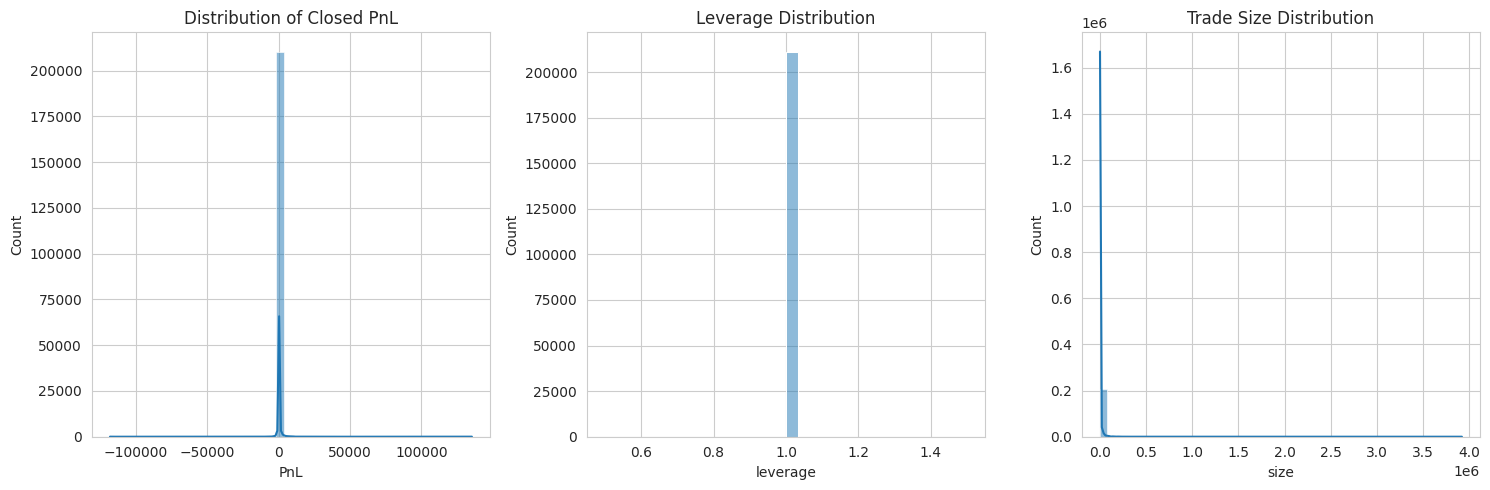

In [ ]:
# PnL distribution
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(trader_data['closedPnL'], bins=50, kde=True)
plt.title('Distribution of Closed PnL')
plt.xlabel('PnL')

plt.subplot(1, 3, 2)
sns.histplot(trader_data['leverage'], bins=30, kde=True)
plt.title('Leverage Distribution')

plt.subplot(1, 3, 3)
sns.histplot(trader_data['size'], bins=50, kde=True)
plt.title('Trade Size Distribution')
plt.tight_layout()
plt.show()

**B. Sentiment Distribution**

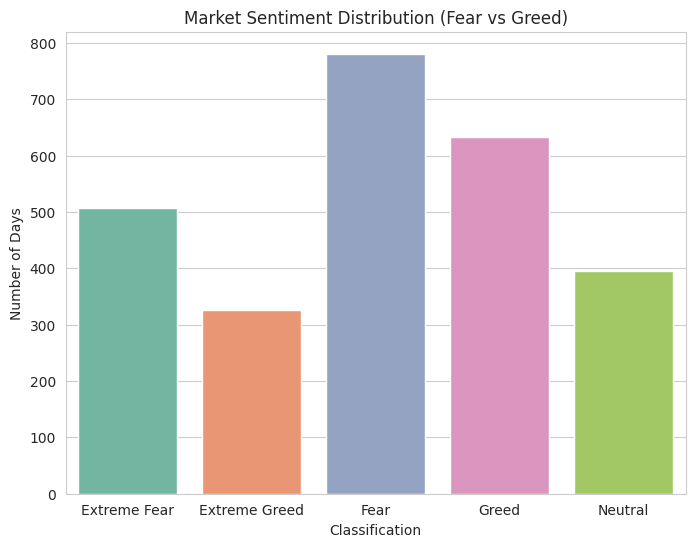

In [ ]:
# Sentiment frequency
sentiment_counts = sentiment_data['Classification'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='Set2')
plt.title('Market Sentiment Distribution (Fear vs Greed)')
plt.ylabel('Number of Days')
plt.show()

**Step 4.2: Bivariate Analysis**

**A. PnL vs Sentiment**

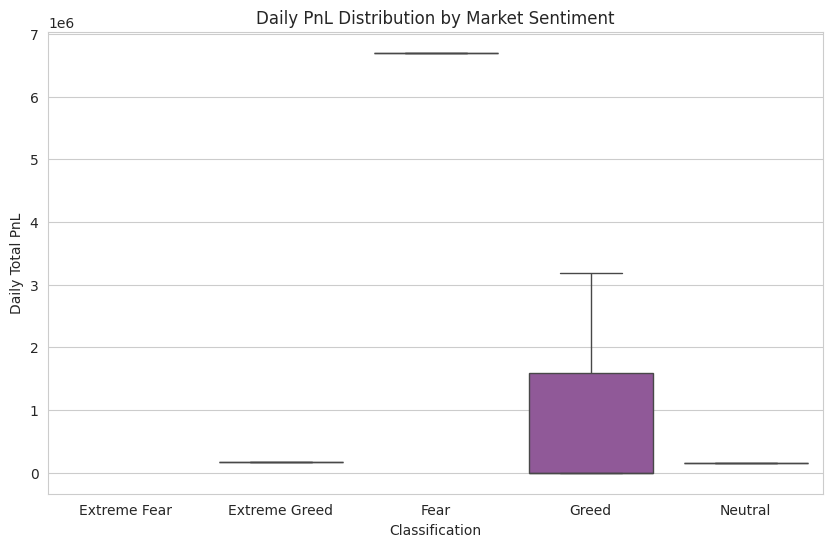

T-test result: t-statistic=2.6510, p-value=0.1177


In [ ]:
# Box plot: PnL by sentiment
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_data, x='Classification', y='daily_pnl', palette='Set1')
plt.title('Daily PnL Distribution by Market Sentiment')
plt.ylabel('Daily Total PnL')
plt.show()

# Statistical test
fear_pnl = merged_data[merged_data['Classification'] == 'Fear']['daily_pnl']
greed_pnl = merged_data[merged_data['Classification'] == 'Greed']['daily_pnl']
t_stat, p_value = ttest_ind(fear_pnl.dropna(), greed_pnl.dropna())
print(f"T-test result: t-statistic={t_stat:.4f}, p-value={p_value:.4f}")

**B. Trading Volume vs Sentiment**

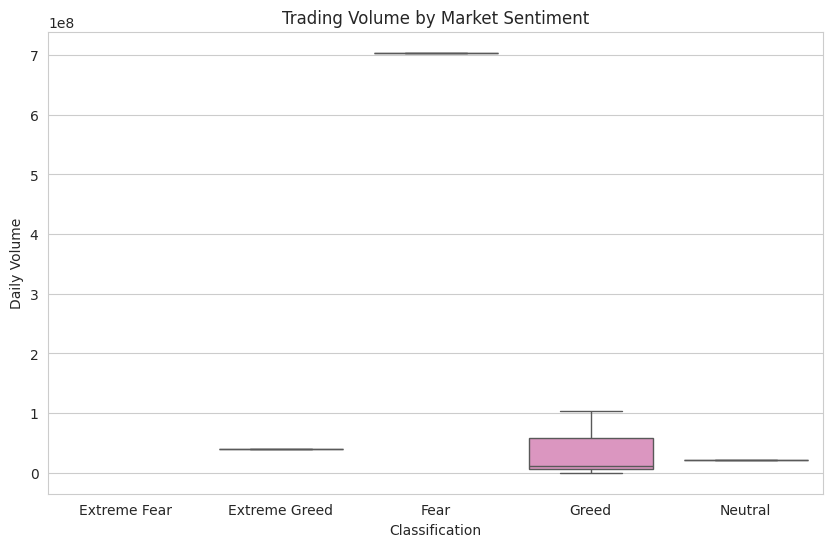

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_data, x='Classification', y='daily_volume', palette='Set2')
plt.title('Trading Volume by Market Sentiment')
plt.ylabel('Daily Volume')
plt.show()

**C. Leverage vs Sentiment**

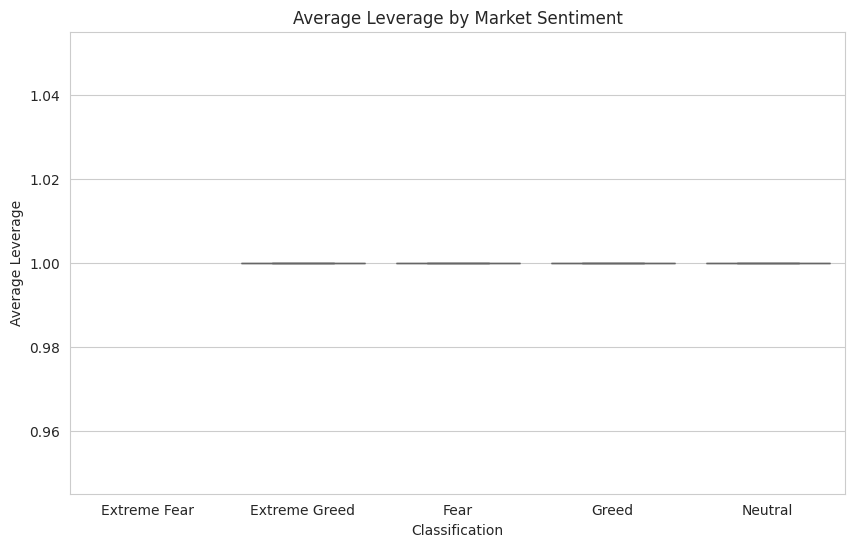

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_data, x='Classification', y='avg_leverage', palette='Set3')
plt.title('Average Leverage by Market Sentiment')
plt.ylabel('Average Leverage')
plt.show()

**Step 4.3: Time Series Analysis**

**A. PnL Over Time with Sentiment**

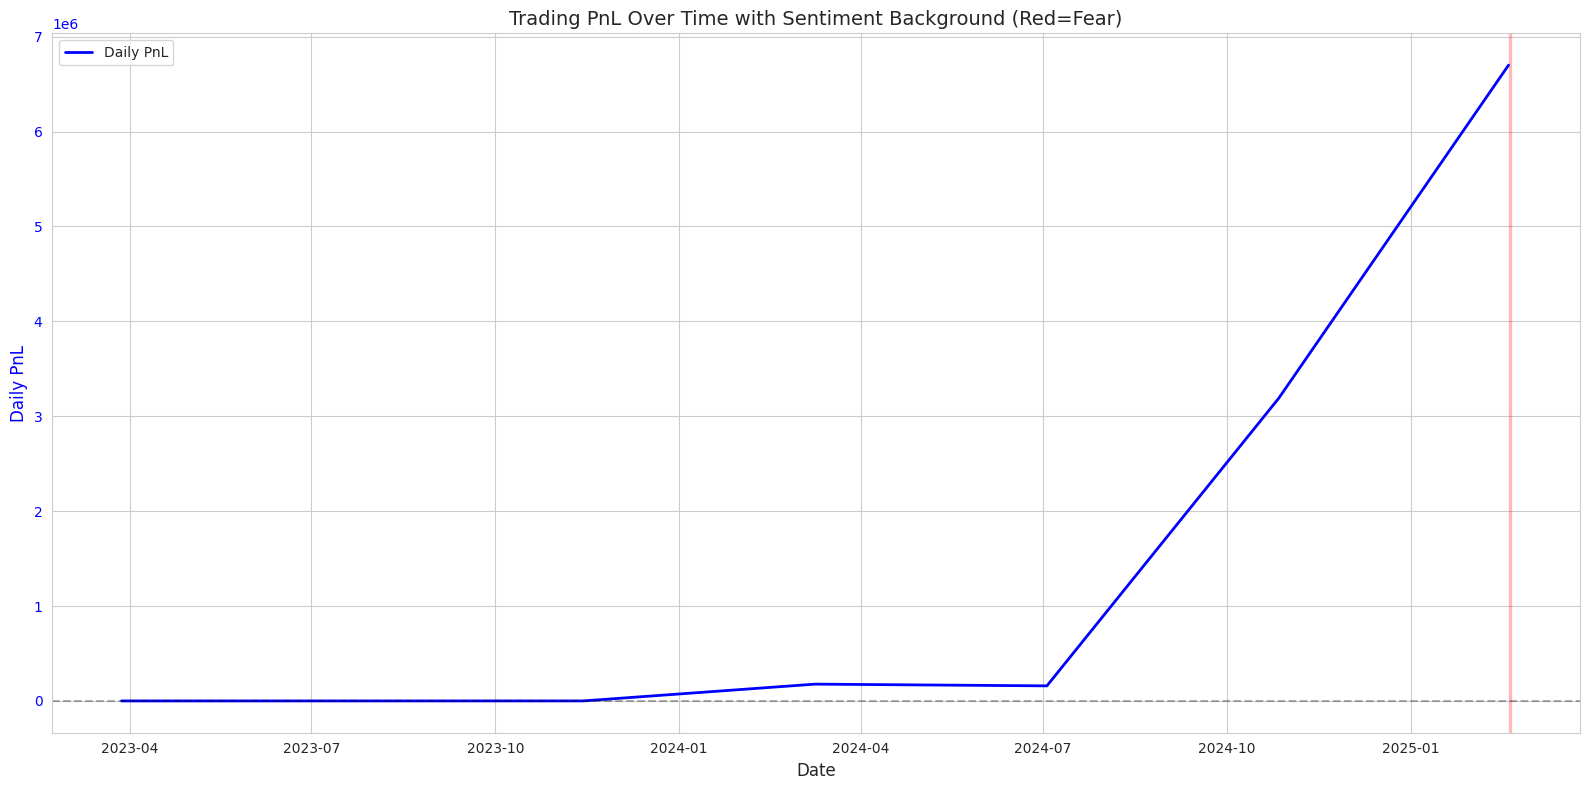

In [ ]:
fig, ax1 = plt.subplots(figsize=(16, 8))

# Plot PnL
ax1.plot(merged_data['date'], merged_data['daily_pnl'], color='blue', label='Daily PnL', linewidth=2)
ax1.axhline(y=0, color='black', linestyle='--', alpha=0.3)
ax1.set_xlabel('Date', fontsize=12)
ax1.set_ylabel('Daily PnL', color='blue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='blue')

# Color background by sentiment
fear_dates = merged_data[merged_data['Classification'] == 'Fear']['date']
for date in fear_dates:
    ax1.axvspan(date, date + pd.Timedelta(days=1), alpha=0.2, color='red')

plt.title('Trading PnL Over Time with Sentiment Background (Red=Fear)', fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()

**B. Volume and Leverage Trends**

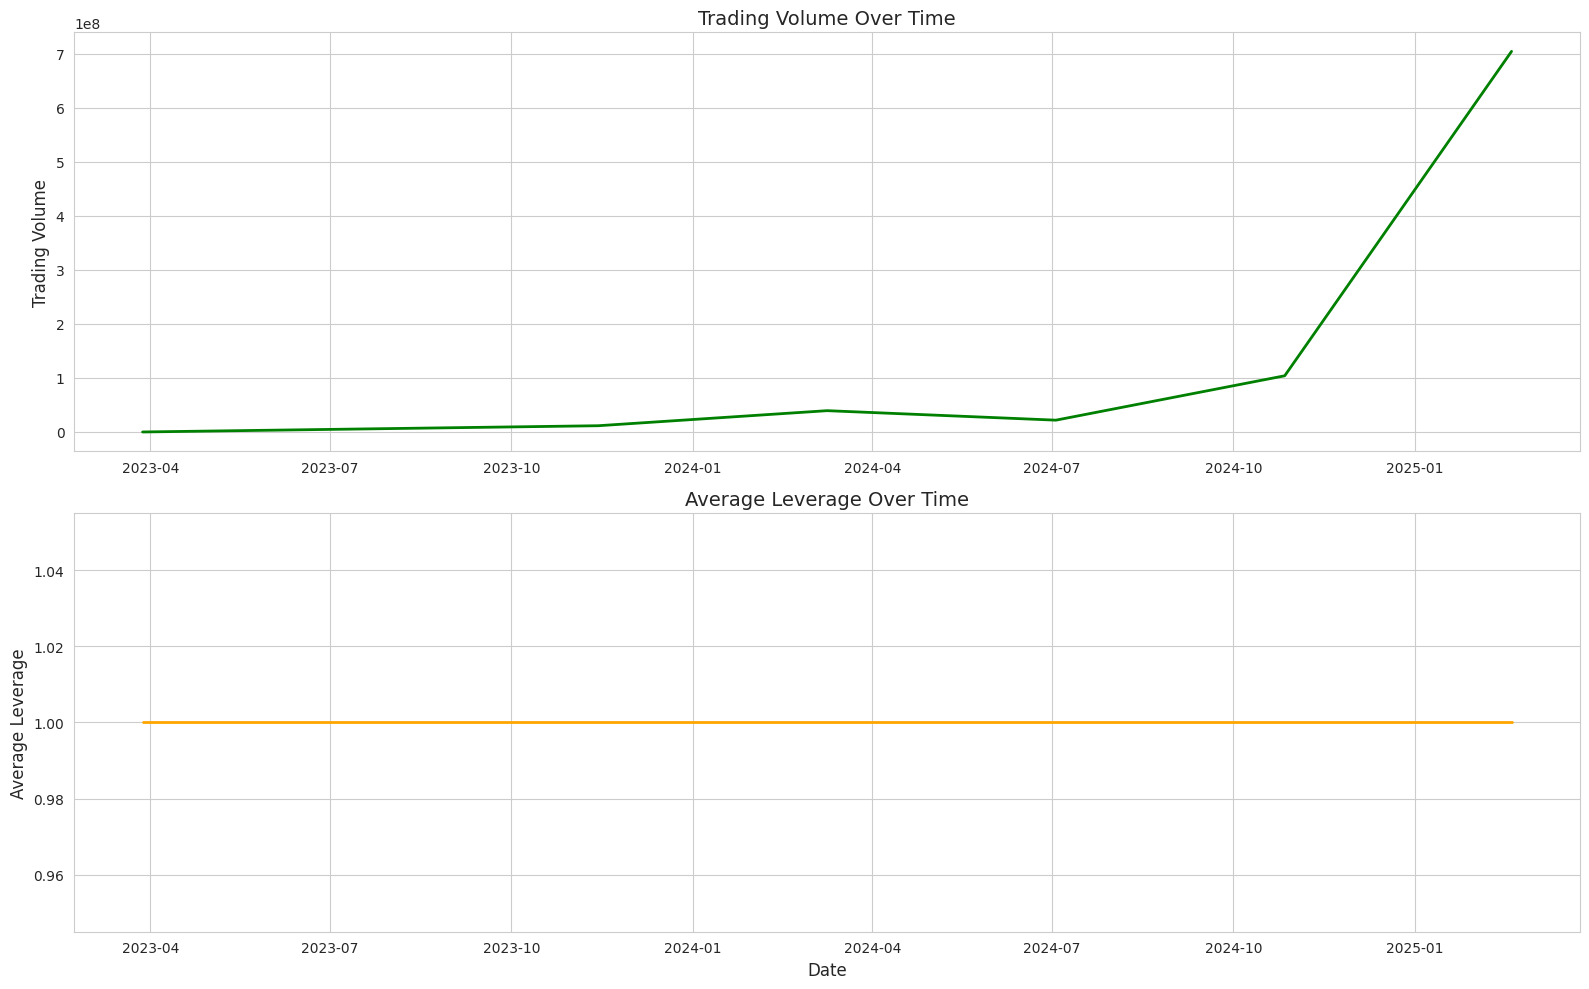

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 10))

# Volume
ax1.plot(merged_data['date'], merged_data['daily_volume'], color='green', linewidth=2)
ax1.set_ylabel('Trading Volume', fontsize=12)
ax1.set_title('Trading Volume Over Time', fontsize=14)

# Leverage
ax2.plot(merged_data['date'], merged_data['avg_leverage'], color='orange', linewidth=2)
ax2.set_ylabel('Average Leverage', fontsize=12)
ax2.set_xlabel('Date', fontsize=12)
ax2.set_title('Average Leverage Over Time', fontsize=14)

plt.tight_layout()
plt.show()

**Step 4.4: Correlation Analysis**

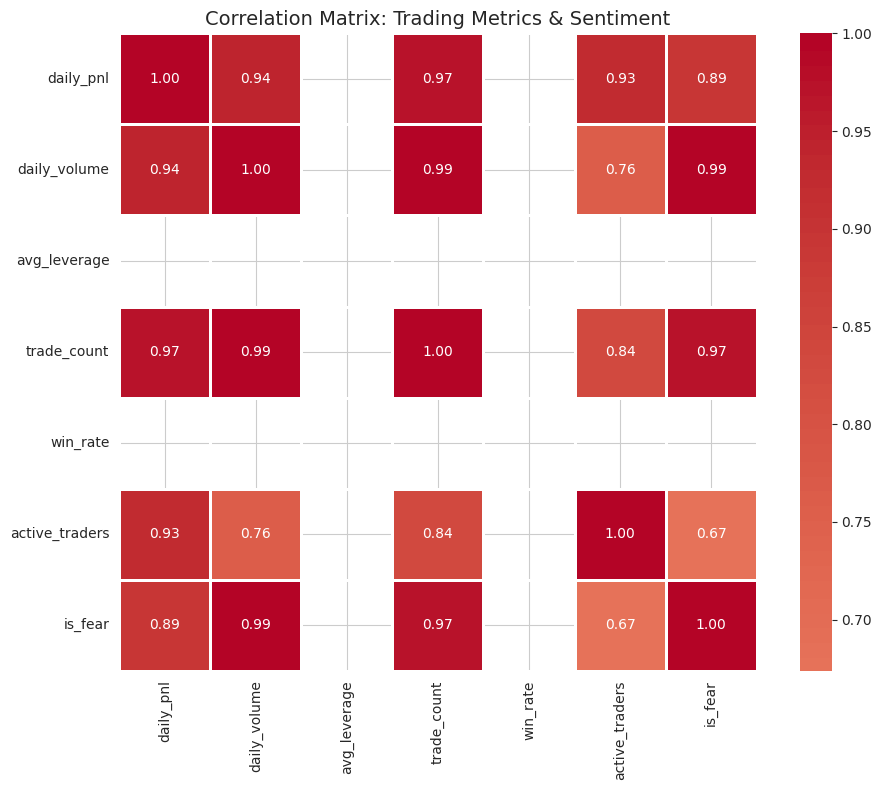

In [ ]:
# Correlation matrix
correlation_cols = ['daily_pnl', 'daily_volume', 'avg_leverage', 'trade_count',
                    'win_rate', 'active_traders', 'is_fear']
correlation_matrix = merged_data[correlation_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=1, fmt='.2f')
plt.title('Correlation Matrix: Trading Metrics & Sentiment', fontsize=14)
plt.tight_layout()
plt.show()

### PHASE 5: DEEP DIVE ANALYSIS (90 minutes)

**Step 5.1: Profitability Analysis by Sentiment**

**A. Aggregate Statistics**

In [ ]:
profitability_by_sentiment = merged_data.groupby('Classification').agg({
    'daily_pnl': ['mean', 'median', 'sum', 'std'],
    'win_rate': 'mean',
    'trade_count': 'sum',
    'active_traders': 'mean'
}).round(2)

print("Profitability by Sentiment:")
print(profitability_by_sentiment)

Profitability by Sentiment:
                 daily_pnl                                    win_rate  \
                      mean      median         sum        std     mean   
Classification                                                           
Extreme Fear           NaN         NaN        0.00        NaN      NaN   
Extreme Greed    176965.49   176965.49   176965.49        NaN      NaN   
Fear            6699925.19  6699925.19  6699925.19        NaN      NaN   
Greed           1063205.51      155.50  3189616.54  1841391.3      NaN   
Neutral          158742.38   158742.38   158742.38        NaN      NaN   

               trade_count active_traders  
                       sum           mean  
Classification                             
Extreme Fear             0            NaN  
Extreme Greed         6962           5.00  
Fear                133871          32.00  
Greed                36289          10.67  
Neutral               7141           8.00  


**B. Win Rate Analysis**

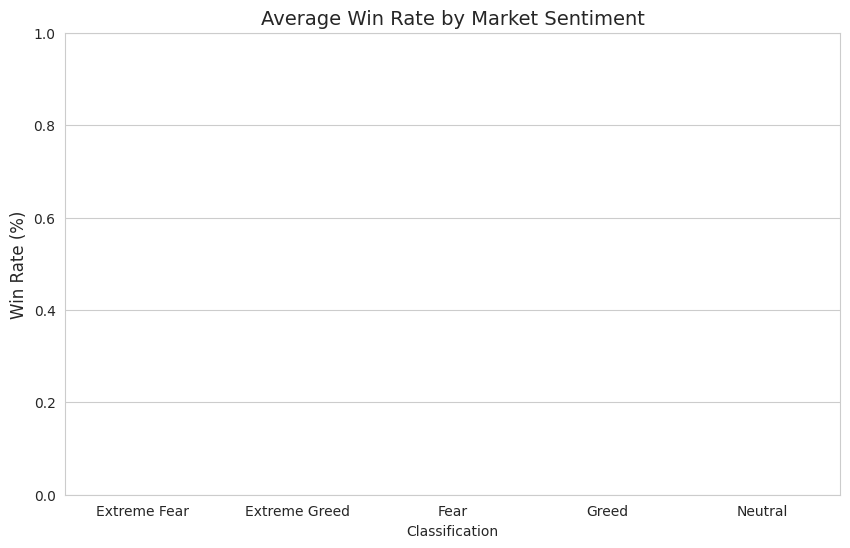

In [ ]:
plt.figure(figsize=(10, 6))
win_rate_sentiment = merged_data.groupby('Classification')['win_rate'].mean()
sns.barplot(x=win_rate_sentiment.index, y=win_rate_sentiment.values, palette='viridis')
plt.title('Average Win Rate by Market Sentiment', fontsize=14)
plt.ylabel('Win Rate (%)', fontsize=12)
plt.ylim(0, 1)
for i, v in enumerate(win_rate_sentiment.values):
    plt.text(i, v + 0.02, f'{v:.2%}', ha='center', fontsize=12)
plt.show()

**C. Profitable vs Unprofitable Traders**

In [ ]:
# Analyze trader characteristics by sentiment
trader_data_with_sentiment = pd.merge(
    trader_data,
    sentiment_data,
    left_on=trader_data['time'].dt.date,
    right_on=sentiment_data['Date'].dt.date,
    how='left'
)

trader_sentiment_metrics = trader_data_with_sentiment.groupby(['account', 'Classification']).agg({
    'closedPnL': ['sum', 'count', 'mean']
}).reset_index()

# Identify consistently profitable traders in each sentiment
profitable_in_fear = trader_sentiment_metrics[
    (trader_sentiment_metrics['Classification'] == 'Fear') &
    (trader_sentiment_metrics[('closedPnL', 'sum')] > 0)
]['account'].unique()

profitable_in_greed = trader_sentiment_metrics[
    (trader_sentiment_metrics['Classification'] == 'Greed') &
    (trader_sentiment_metrics[('closedPnL', 'sum')] > 0)
]['account'].unique()

print(f"Traders profitable in Fear: {len(profitable_in_fear)}")
print(f"Traders profitable in Greed: {len(profitable_in_greed)}")
print(f"Traders profitable in both: {len(set(profitable_in_fear) & set(profitable_in_greed))}")

Traders profitable in Fear: 30
Traders profitable in Greed: 26
Traders profitable in both: 24


**Step 5.2: Risk Behavior Analysis**

**A. Leverage Patterns**

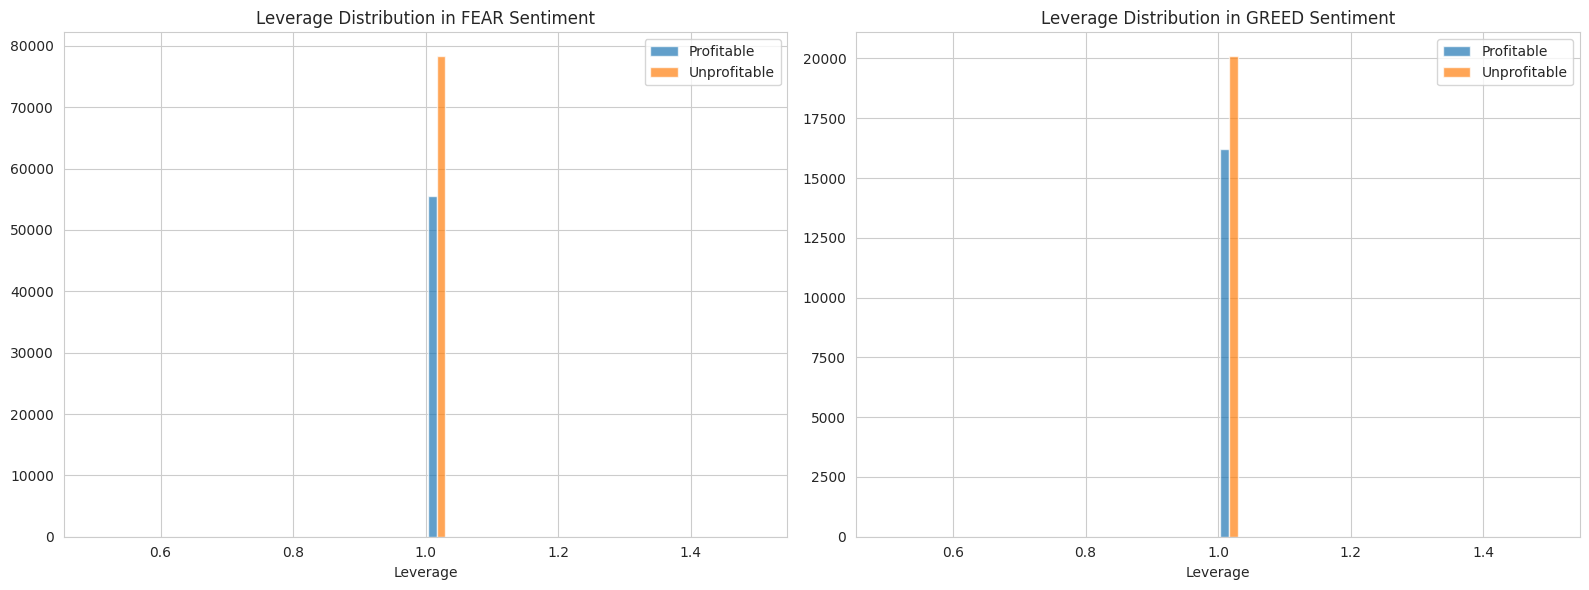

In [ ]:
# Leverage distribution by sentiment and profitability
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Fear periods
fear_data = trader_data_with_sentiment[trader_data_with_sentiment['Classification'] == 'Fear']
profitable_fear = fear_data[fear_data['closedPnL'] > 0]['leverage']
unprofitable_fear = fear_data[fear_data['closedPnL'] <= 0]['leverage']

axes[0].hist([profitable_fear, unprofitable_fear], bins=30, label=['Profitable', 'Unprofitable'], alpha=0.7)
axes[0].set_title('Leverage Distribution in FEAR Sentiment', fontsize=12)
axes[0].set_xlabel('Leverage')
axes[0].legend()

# Greed periods
greed_data = trader_data_with_sentiment[trader_data_with_sentiment['Classification'] == 'Greed']
profitable_greed = greed_data[greed_data['closedPnL'] > 0]['leverage']
unprofitable_greed = greed_data[greed_data['closedPnL'] <= 0]['leverage']

axes[1].hist([profitable_greed, unprofitable_greed], bins=30, label=['Profitable', 'Unprofitable'], alpha=0.7)
axes[1].set_title('Leverage Distribution in GREED Sentiment', fontsize=12)
axes[1].set_xlabel('Leverage')
axes[1].legend()

plt.tight_layout()
plt.show()

**B. Risk-Adjusted Returns**

In [ ]:
# Calculate Sharpe-like ratio for each sentiment period
fear_returns = merged_data[merged_data['Classification'] == 'Fear']['daily_pnl']
greed_returns = merged_data[merged_data['Classification'] == 'Greed']['daily_pnl']

fear_sharpe = fear_returns.mean() / fear_returns.std() if fear_returns.std() > 0 else 0
greed_sharpe = greed_returns.mean() / greed_returns.std() if greed_returns.std() > 0 else 0

print(f"Risk-Adjusted Returns (Sharpe-like):")
print(f"Fear: {fear_sharpe:.4f}")
print(f"Greed: {greed_sharpe:.4f}")

Risk-Adjusted Returns (Sharpe-like):
Fear: 0.0000
Greed: 0.5774


**Step 5.3: Trading Pattern Analysis**

**A. Trading Frequency by Sentiment**

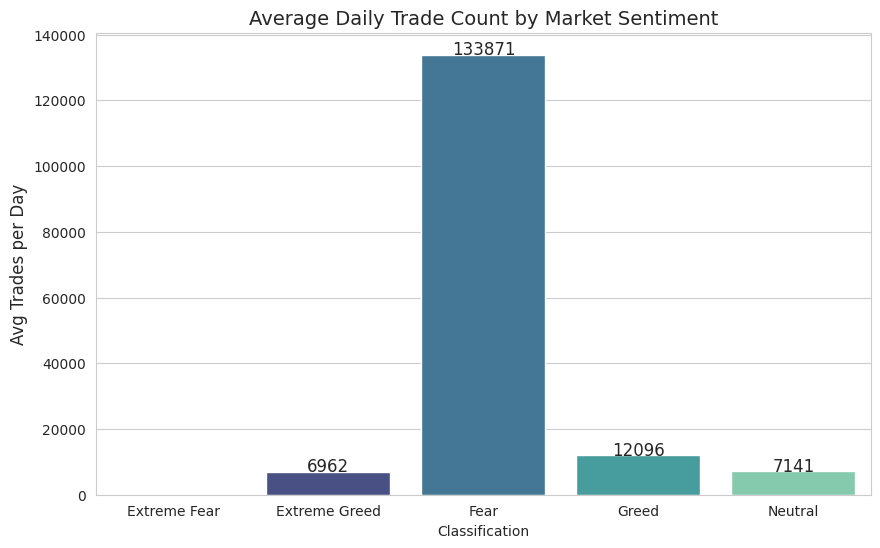

In [ ]:
plt.figure(figsize=(10, 6))
trade_count_sentiment = merged_data.groupby('Classification')['trade_count'].mean()
sns.barplot(x=trade_count_sentiment.index, y=trade_count_sentiment.values, palette='mako')
plt.title('Average Daily Trade Count by Market Sentiment', fontsize=14)
plt.ylabel('Avg Trades per Day', fontsize=12)
for i, v in enumerate(trade_count_sentiment.values):
    plt.text(i, v + 1, f'{v:.0f}', ha='center', fontsize=12)
plt.show()

**B. Long vs Short Analysis**

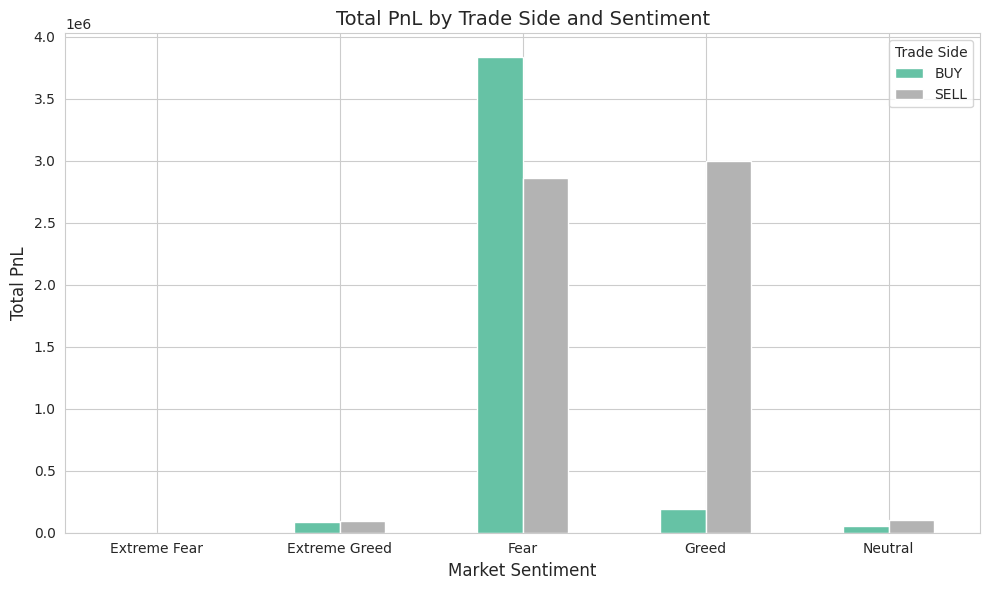

In [ ]:
# Analyze side (long/short) preferences by sentiment
side_sentiment = trader_data_with_sentiment.groupby(['Classification', 'side']).agg({
    'closedPnL': ['sum', 'mean', 'count']
}).reset_index()

# Flatten columns
side_sentiment.columns = ['_'.join(col).strip() if col[1] else col[0] for col in side_sentiment.columns.values]

# Visualization
pivot_side = side_sentiment.pivot_table(
    index='Classification',
    columns='side',
    values='closedPnL_sum'
)

pivot_side.plot(kind='bar', figsize=(10, 6), colormap='Set2')
plt.title('Total PnL by Trade Side and Sentiment', fontsize=14)
plt.ylabel('Total PnL', fontsize=12)
plt.xlabel('Market Sentiment', fontsize=12)
plt.legend(title='Trade Side')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

**C. Intraday Patterns**

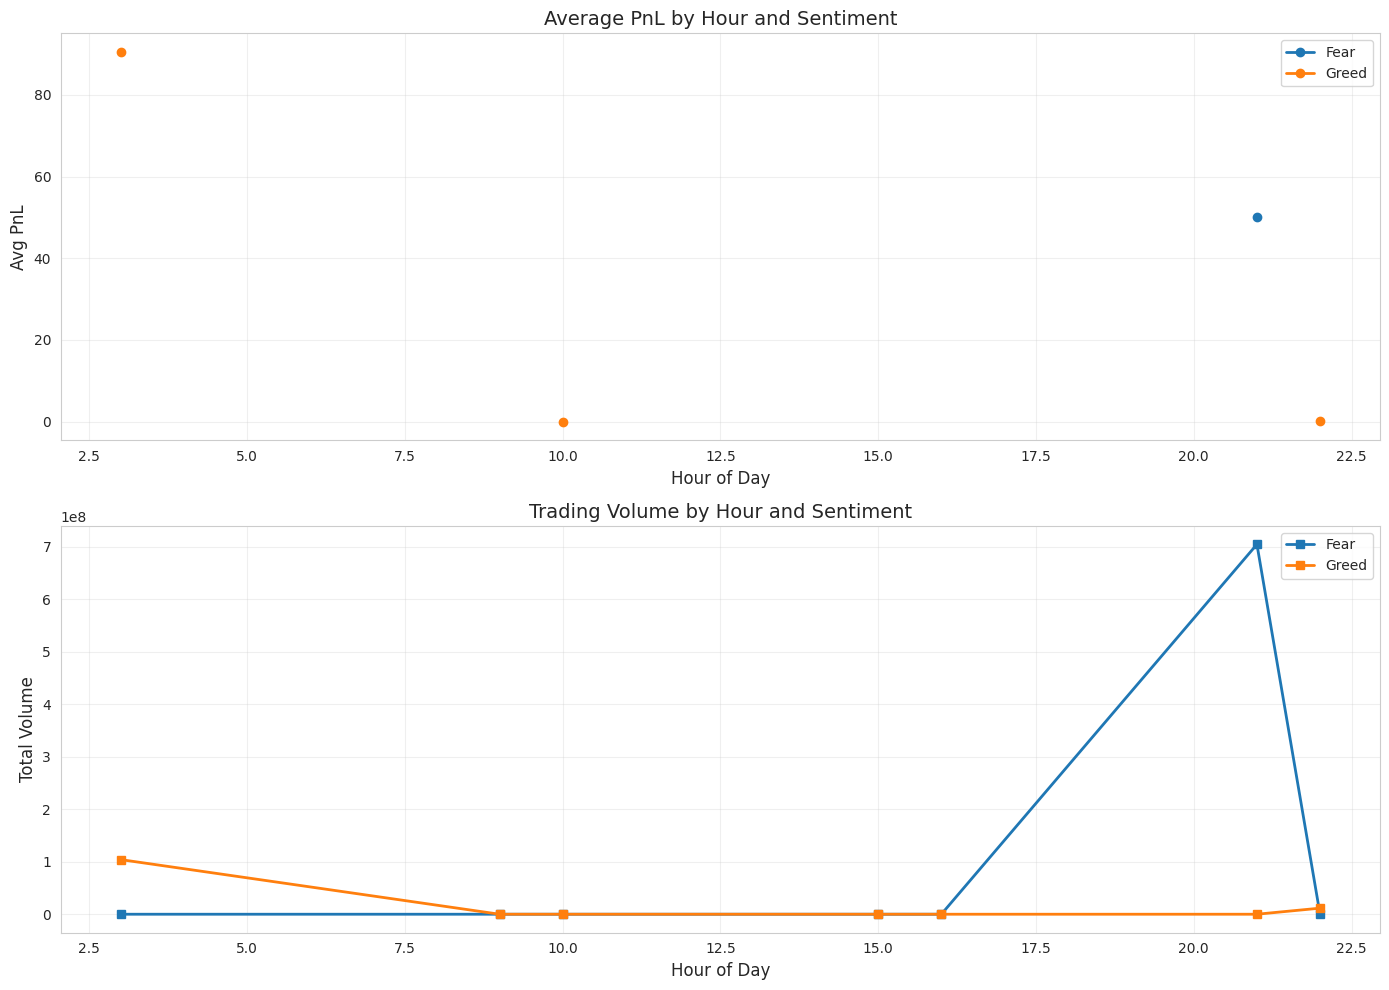

In [ ]:
# Hourly trading patterns by sentiment
hourly_sentiment = trader_data_with_sentiment.groupby(['hour', 'Classification']).agg({
    'closedPnL': 'mean',
    'size': 'sum'
}).reset_index()

fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# PnL by hour
for sentiment in ['Fear', 'Greed']:
    data = hourly_sentiment[hourly_sentiment['Classification'] == sentiment]
    axes[0].plot(data['hour'], data['closedPnL'], marker='o', label=sentiment, linewidth=2)
axes[0].set_title('Average PnL by Hour and Sentiment', fontsize=14)
axes[0].set_xlabel('Hour of Day', fontsize=12)
axes[0].set_ylabel('Avg PnL', fontsize=12)
axes[0].legend()
axes[0].grid(alpha=0.3)

# Volume by hour
for sentiment in ['Fear', 'Greed']:
    data = hourly_sentiment[hourly_sentiment['Classification'] == sentiment]
    axes[1].plot(data['hour'], data['size'], marker='s', label=sentiment, linewidth=2)
axes[1].set_title('Trading Volume by Hour and Sentiment', fontsize=14)
axes[1].set_xlabel('Hour of Day', fontsize=12)
axes[1].set_ylabel('Total Volume', fontsize=12)
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

**Step 5.4: Sentiment Transition Analysis**

**A. Sentiment Change Impact**

In [ ]:
# Identify sentiment transitions
merged_data['sentiment_changed'] = merged_data['Classification'] != merged_data['Classification'].shift(1)
merged_data['prev_sentiment'] = merged_data['Classification'].shift(1)

# Analyze behavior during transitions
transition_data = merged_data[merged_data['sentiment_changed'] == True].copy()
transition_data['transition_type'] = transition_data['prev_sentiment'].astype(str) + ' -> ' + transition_data['Classification'].astype(str)

transition_stats = transition_data.groupby('transition_type').agg({
    'daily_pnl': ['mean', 'sum', 'count'],
    'daily_volume': 'mean',
    'avg_leverage': 'mean'
}).round(2)

print("Behavior During Sentiment Transitions:")
print(transition_stats)

Behavior During Sentiment Transitions:
                           daily_pnl                    daily_volume  \
                                mean         sum count          mean   
transition_type                                                        
Extreme Greed -> Neutral   158742.38   158742.38     1  2.184323e+07   
Greed -> Extreme Greed     176965.49   176965.49     1  3.940677e+07   
Greed -> Fear             6699925.19  6699925.19     1  7.041585e+08   
Neutral -> Greed          3189461.03  3189461.03     1  1.039478e+08   
nan -> Greed                    0.00        0.00     1  4.770000e+02   

                         avg_leverage  
                                 mean  
transition_type                        
Extreme Greed -> Neutral          1.0  
Greed -> Extreme Greed            1.0  
Greed -> Fear                     1.0  
Neutral -> Greed                  1.0  
nan -> Greed                      1.0  


### PHASE 6: ADVANCED INSIGHTS & PREDICTIVE SIGNALS (60 minutes)

**Step 6.1: Identify Top Performing Traders**

In [ ]:
# Top 10% traders by total PnL
top_traders = trader_metrics.nlargest(int(len(trader_metrics) * 0.1), 'total_pnl')

# Analyze their behavior in different sentiments
top_trader_sentiment_behavior = trader_data_with_sentiment[
    trader_data_with_sentiment['account'].isin(top_traders['account'])
].groupby('Classification').agg({
    'closedPnL': ['mean', 'sum'],
    'leverage': 'mean',
    'size': 'mean'
}).round(2)

print("Top Traders' Behavior by Sentiment:")
print(top_trader_sentiment_behavior)

# Compare with average traders
avg_sentiment_behavior = trader_data_with_sentiment.groupby('Classification').agg({
    'closedPnL': ['mean', 'sum'],
    'leverage': 'mean',
    'size': 'mean'
}).round(2)

print("\nAverage Traders' Behavior by Sentiment:")
print(avg_sentiment_behavior)

Top Traders' Behavior by Sentiment:
               closedPnL             leverage     size
                    mean         sum     mean     mean
Classification                                        
Extreme Fear         NaN        0.00      NaN      NaN
Extreme Greed       0.85     2606.89      1.0  7639.72
Fear              107.18  3421710.93      1.0  4269.63
Greed             394.66  1094405.45      1.0  7608.59
Neutral            38.09    62586.18      1.0  2875.22

Average Traders' Behavior by Sentiment:
               closedPnL             leverage     size
                    mean         sum     mean     mean
Classification                                        
Extreme Fear         NaN        0.00      NaN      NaN
Extreme Greed      25.42   176965.49      1.0  5660.27
Fear               50.05  6699925.19      1.0  5259.98
Greed              87.89  3189616.54      1.0  3182.88
Neutral            22.23   158742.38      1.0  3058.85
